## Imports

In [ ]:
import functools
import math
import pandas as pd

import eesrep
from eesrep.components.bus import GenericBus
from eesrep.components.sink_source import FatalSink, Source

import pylab as pl
from IPython import display

##  Model definition

In [1]:
model = eesrep.Eesrep(interface="docplex")

zone = GenericBus("Zone_1")

load = FatalSink(name="load",
                                sink_flow=pd.DataFrame({"time":range(10000), "value":[abs(math.sin(i/200)) for i in range(10000)]}))

energy_source = Source(name="energy_source",
                                    p_min=0.,
                                    p_max=None,
                                    price=1.)

for c in [zone, 
            load,
            energy_source]:
    model.add_component(c)

model.plug_to_bus(load.power_in, zone.output, 1., 0.)
model.plug_to_bus(energy_source.power_out, zone.input, 1., 0.)

horizon_count = 30
model.define_time_range(1., 100, 100, horizon_count)

## Plotter definition

In [2]:
class Plotter:
    def __init__(self, horizon_count):     
        self.horizon_count = horizon_count
        self.iteration = 0 

    def plot(self, df:pd.DataFrame):
        #   Clear output to remove the past graph
        display.clear_output(wait=True)
        pl.cla()
        
        #   Plot definition
        pl.plot(df["time"], df["energy_source_power_out"], label = "Energy source power out")
        pl.title(f"Plot at horizon {self.iteration}")
        
        pl.xlabel("Time (h)")
        pl.ylabel("Production (MW)")

        pl.legend()
    
        #   Display
        display.display(pl.gcf())

        self.iteration += 1

p = Plotter(horizon_count)

def update_plot(df:pd.DataFrame, p:Plotter):
    p.plot(df)

    return df

model.set_post_processing(functools.partial(update_plot, p=p))

## Solve

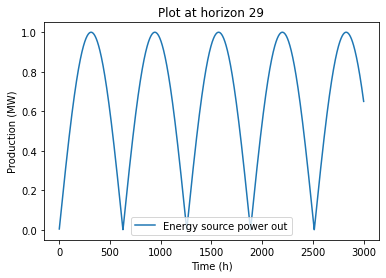

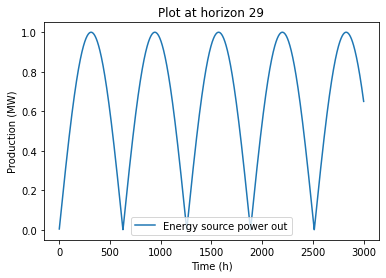

In [3]:
model.solve()